# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'C:\Users\eshai\Downloads\human_temp\data\human_body_temperature.csv')

df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


### Is the distribution of body temperatures normal? 

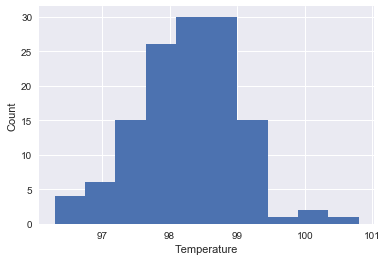

In [3]:
temps = df['temperature']

n_bins = len(temps)

bins = np.sqrt(n_bins)

bins = int(bins)

sns.set()
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.hist(temps)

plt.show()

The chart shows the distribution of human temperature. We cant really get a sense of the shape of the distribution. Constructing an ecdf chart of human body temperature will get a better idea.

In [4]:
def ecdf(data):
    
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y



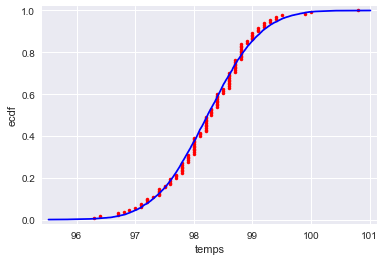

In [5]:
x_temps, y_temps = ecdf(temps)

temp_reps = np.random.normal(np.mean(temps), np.std(temps), size=10000)

x_temp_reps, y_temp_reps = ecdf(temp_reps)

_ = plt.plot( x_temps, y_temps, marker='.', linestyle= 'none', color='red')
_ = plt.plot( x_temp_reps, y_temp_reps, color='blue')
_ = plt.margins(.02)
_ = plt.xlabel('temps')
_ = plt.ylabel('ecdf')

_ = plt.show()

The graph above shows that the human temperture date is normally distributed.

### Is the sample size large? Are the observations independent?

Based on CLT, the data set must contain more the 30 samples more the distribution on sample means to be normally distributed. Since the data set has 130 observations, the sample size is large enough. Each observation is independent of one another since the each observation doesnt depend on another one.

## Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?

In order to verify if the true population is 98.6 degrees F, we must run a one sample test. One appropriate here because we onlu have one sample set of data. Also in this situation a z test would be appropriate since we have over 30 samples in the data set.

I will test:

$H_{0}$: The sample mean and the population mean are equal.

$H_{A}$: The sample mean and the population mean are different.


In [6]:
# Run Hypothesis test:
bs_reps = np.empty(10000)

n_reps = len(bs_reps)

n_temps = len(temps)

for i in range(n_reps):
    bs_samples = np.random.choice(temps, size=n_temps)
    bs_reps[i] = np.mean(bs_samples)
    
p = np.sum(bs_reps >= 98.6) / len(bs_reps)

print('pvalue =', p)



pvalue = 0.0


Since the p value is extremely low, we can be fairly certain that our sample mean is different from the true population mean. We can repeat the test using a t-statisitc to confirm our results 

In [7]:
z = (np.mean(temps) - 98.6) / (np.std(temps) / np.sqrt(n_temps))

print('z =', z)

Pval_z = stats.norm.sf(abs(z))*2

print('pval of z:', Pval_z)

z = -5.47592520208
pval of z: 4.35231516588e-08


The p value of our z statistic further implies that our sample mean is different from our known population mean. We will test our hypothesis again using a t - statistic.


In [8]:
# Run t-test
p_t = stats.t.sf(np.abs(z), len(temps)-1)*2

print('t is', z)
print('95%p =', p_t)

t is -5.47592520208
95%p = 2.18874646241e-07


Although the pvalue for the t-test is different, it still implies that we should reject the null hypothesis.

### Draw a small sample of size 10 from the data and repeat both tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the t and z statistic?

Since we only have a sample size of 10, the t statistic would not be appropriate to use for this set of data.

In [9]:
# Drawing 10 samples from temps:
s = np.random.choice(temps, size=10)
l = len(s)
print(s)

[ 97.4  98.   99.   98.   98.4  98.   98.7  98.8  98.5  98.2]


In [10]:
# performing t test:
ts = (np.mean(s) - 98.6) / (np.std(s) / np.sqrt(l))

print('t =', ts)

pval_ts = stats.t.sf(np.abs(z), len(s)-1)*2
print('p =',pval_ts)

t = -2.10042012604
p = 0.000392231622671


In [11]:
# Perform z test
zs = (np.mean(s) - 98.6) / (np.std(s) / np.sqrt(l))

print('z =', zs)

p_zs = stats.norm.sf(abs(z))*2

print('p =',p_zs)

z = -2.10042012604
p = 4.35231516588e-08


The p values generated by the z-test and the t test are significantly different. Since our data set only contains 10 samples, it isn't appropriate to use the z statistic. When the sample size is less less than 30, the t statistic should be used

### At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.

In [12]:
# Calculating Mean and Margin of Error
t_mean = np.mean(temps)
print('Mean of temps is:', t_mean)
z = 1.96
error = z * np.std(temps) / np.sqrt(n_temps)
print('Margin of error:', error)

Mean of temps is: 98.24923076923078
Margin of error: 0.125550964803


The mean temperature of the sample data is 98.25 degrees. Based on the Margin of Error, we can expect the true population mean to differ by about 12.6 percent. 

In [13]:
# Calculate Confidence Interval 
Con_int = np.percentile(temps, [2.5, 97.5])
print('We expect 95% of temprature data to be between', Con_int)

We expect 95% of temprature data to be between [ 96.7225  99.4775]


We can say with 95% confidence that our calculated confidence interval 96.72 degree and 99.48 degrees contains the true population mean. 

### Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

To test if there is a significant difference in normal male and female body temperature, I will run a two sample permutation test with difference of mean as the measure. A permutation test is appropriate to test if male and female body temperature have similar distributions and means. First i will visualize the data for EDA.

In [14]:
# Filter out relevant data and calculate ecdf:
temp_m = df[df['gender'] == 'M']['temperature']

temp_f = df[df['gender'] == 'F']['temperature']

x_temp_m, y_temp_m = ecdf(temp_m)

x_temp_f, y_temp_f = ecdf(temp_f)

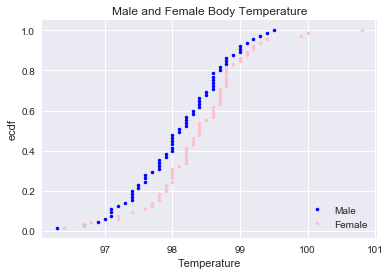

In [15]:
# Generate Plot:
_ = plt.plot(x_temp_m, y_temp_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_temp_f, y_temp_f, marker='.', linestyle='none', color='pink')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ecdf')
_ = plt.legend(('Male', 'Female'), loc='lower right')
_ = plt.title('Male and Female Body Temperature')

plt.show()


In [16]:
# create function to calc diff of mean:
def diff_of_mean(d1, d2):
    dom = (np.mean(d1) - np.mean(d2))
    return dom

In [17]:
# Calc diff of mean:
dom = diff_of_mean(temp_f, temp_m)

print('Difference of sample mean:', dom)

Difference of sample mean: 0.289230769230727


In [18]:
# Run Hypothesis test:
perm_replicates = np.empty(100000)

size = len(perm_replicates)

temps_combined  = np.concatenate((temp_m, temp_f))

for i in range(size):
    combined_perm_temp = np.random.permutation(temps_combined)
    
    mt_perms = combined_perm_temp[:len(temp_m)]
    
    ft_perms = combined_perm_temp[len(temp_m):]
    
    perm_replicates[i] = diff_of_mean(mt_perms, ft_perms)
    
pval = np.sum(perm_replicates >= dom ) / len(perm_replicates)

print('pval = ', pval)
        

pval =  0.01264


Since the p_value is smaller than .055, There is a difference in the distribution and means of male and female body temperature

# Conclution:

Carl Wunderlich proposed the mean human body temperature is 98.6 in 1868. However the results from our analysis differs from his proposal. We found that we can be 95% confident that the true population mean lies within our calculated confidence interval of 96.72 degrees and  99.48 degrees. We also conluded that the difference in the mean and distribution of male and female body temperature is statistically significant as well.